# Principles of Numerical Mathematics

From Ch. 2 of Quarteroni (2000) and https://github.com/mitmath/18335/blob/master/notes/Floating-Point-Intro.ipynb 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Well-posedness and condition number

### Definition of problem types
A problem is to find $x$ suth that $F(x,d)=0$, where $d$ is a set of data and $F$ is the functional relationship between $x$ and $d$.
- Direct  : $x$ unknown, $F$ and $d$ given
- Inverse : $d$ unknown, $F$ and $x$ given
- Identification : $F$ unknown, $x$ and $d$ given


## Well-posedness and condition number

### Well-posed problem
A (PDE) problem is called *well posed* or *stable* provided it has a **unique** solution which depends **continuously** on the given data. Otherwise, it is called *ill-posed* or *improperly posed* or *unstable.*
#### Example
\begin{equation}
p(x) = x^{4}-x^{2}(2a-1)+a(a-1) 
\end{equation}
has discontinuous variation of the number of real roots: 4 if $a \ge 1$, 2 if $a \in [0,1)$ and 0 if $a \lt 0$.


## Well-posedness and condition number

### Well-posed problem

#### Meaning of *continuous dependence* 
Continuous dependence on the data means that **small** perturbations on the data $d$ yield **small** changes in the solution $x$.
- $\delta d$: An admissiable perturbation on the data
- $\delta x$: The consequent change in the solution
- $F(x+\delta x, d + \delta d) = 0$, then,
\begin{equation}
^{\forall}\eta > 0, \  ^{\exists}K(\eta,d) \text{ such that } \Vert \delta d \Vert < \eta \Rightarrow \Vert \delta x \Vert \le K(\eta, d) \Vert \delta d \Vert.
\end{equation}


## Well-posedness and condition number

### Well-posed problem

#### Condition number
- Relative condition number
\begin{equation}
 K(d) = \sup_{\delta d \in D} \frac{ \Vert \delta x \Vert / \Vert x \Vert}{\Vert \delta d \Vert / \Vert d \Vert},
\end{equation}
where $D$ is a small neighborhood around the origin for *admissable* perturbations.
- Absolute condition number for $x=0$ or $d=0$
\begin{equation}
 K(d) = \sup_{\delta d \in D} \frac{\Vert \delta x \Vert}{\Vert \delta d \Vert}.
\end{equation}

- *ill-conditioned* if $K(d)$ is *big*, of which precise meaning varies from one problem to another.
- *ill-conditioned* $\neq$ *ill-posed*! 

#### Example 1
\begin{equation}
x^{2} - 2px + 1 = 0 \quad (p \ge 1)
\end{equation}
The solution is $x_{\pm}=p \pm \sqrt{p^{2}-1}$. 
Now, let a function $F(x,p) = x^{2}-2px +1$, where the "datum" is the coefficient $p$, and $x$ is the unknown vector of components $\{x_{+},x_{-}\}$.

Let's also define a *resolvent* $G: x=G(p)$, where $x$ is the solution, such that $F(G(p),p)=0$.
Expressing the solutions using resolvents, we get
\begin{equation}
  x_{\pm} = G_{\pm}(p) = p \pm \sqrt{p^{2}-1}.
\end{equation}
and 
\begin{equation}
  G^{\prime}_{\pm}(p) = 1 \pm \frac{p}{\sqrt{p^{2}-1}}.
\end{equation}

From
\begin{equation}
x + \delta x = G(p+\delta p),
\end{equation}
we get
\begin{equation}
\delta x = G(p+\delta p)-x = G(p+\delta p)-G(p).
\end{equation}

The Taylor's expansion of $G$ tells us that
\begin{equation}
 G(p+\delta p)-G(p) = G^{\prime}(p)\delta p + O(||\delta p||) \quad \text{for} \quad \delta p \rightarrow 0.
\end{equation}

Thus, 
\begin{equation}
\delta x \approx G^{\prime}(p)\delta p.
\end{equation}

Now we get the following form of the condition number:
\begin{equation}
K(p) = \sup_{\delta p \in D} \frac{\Vert \delta x \Vert / \Vert x \Vert}{\Vert \delta p \Vert / \Vert p \Vert } = \sup_{\delta p \in D} \frac{ \Vert G^{\prime}(p)\delta p \Vert  \,  \Vert p \Vert }{ \Vert G(p) \Vert  \,  \Vert \delta p \Vert }
 \approx  \Vert G^{\prime}(p) \Vert  \frac{ \Vert p \Vert }{ \Vert G(p) \Vert }
\end{equation}

Finally, we get
\begin{equation}
K(p) = \left\Vert 1 \pm \frac{p}{\sqrt{p^{2}-1}}  \right\Vert \frac{\Vert p\Vert }{\Vert p \pm \sqrt{p^{2}-1} \Vert} = \frac{|p|}{\sqrt{p^{2}-1}}
\end{equation}

So, $K$ is small (.ie., $\sim$1) for $p \ge \sqrt{2}$; goes to $\infty$ as $p \rightarrow 1$ making the problem (ill-posed or ill-conditioned?).

However, this problem can **regularized**: i.e., the singularity at $p=1$ can be removed by the change of parameters.
By letting $t = p + \sqrt{p^{2}-1}$ and $F(x,t) = x^{2} - ((1+t^{2})/t)x + 1 = 0$, the roots become $x=t$ and $1/t$ and coincide with each other when $t=1$ (i.e., $p=1$).

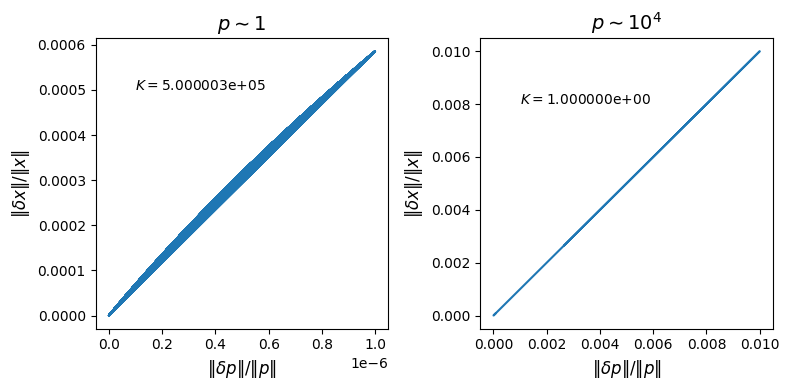

In [2]:
def get_x( p ):
    return np.array([p+np.sqrt(p**2-1),p-np.sqrt(p**2-1)])

eps1 = 1e-6
p1 = 1.0 + eps1
K1 = p1 / (p1**2 - 1)
x1 = np.abs(get_x(p1)[0])
dp1 = np.random.rand(10000)*eps1
x1vals = np.abs( get_x( p1 + dp1 )[0] - x1 ) / x1

p2 = 1e4
K2 = p2 / np.sqrt(p2**2 - 1)
x2 = np.abs(get_x(p2)[0])
dp2 = np.random.rand(10000)*1e2
x2vals = np.abs( get_x( p2 + dp2 )[0] - x2 ) / x2

fig, axs = plt.subplots(1,2, figsize=(8,4))
axs[0].plot(dp1/p1, x1vals)
axs[0].set_xlabel("$\Vert \delta p \Vert/\Vert p \Vert$", fontsize=12)
axs[0].set_ylabel("$\Vert \delta x \Vert/\Vert x \Vert$", fontsize=12)
axs[0].text(1.0e-7,0.0005,"$K = ${K:e}".format(K=K1))
axs[0].set_title("$p \sim 1$", fontsize=14)
axs[1].plot(dp2/p2, x2vals)
axs[1].set_xlabel("$\Vert \delta p \Vert/\Vert p \Vert$", fontsize=12)
axs[1].set_ylabel("$\Vert \delta x \Vert/\Vert x \Vert$", fontsize=12)
axs[1].text(1.0e-3,0.008,"$K = ${K:e}".format(K=K2))
axs[1].set_title("$ p \sim 10^{4}$", fontsize=14)

plt.tight_layout()
plt.show()

#### Example 2
Let's consider a linear mapping:
\begin{equation}
 f: \mathbb{R}^{2} \rightarrow \mathbb{R}, \quad f(a,b) = a+b
\end{equation}

Let's note that the resolvent $G$ is equal to $f(a,b)$ in this case and the gradient is the vector $f^{\prime}(a,b)=(1,1)$. Also, the data ($d$) in this problem is a vector composed of two parameters, $(a,b)$.
Using $L_{1}$ norm ($\Vert \mathbf{a} \Vert_{1}=\sum_{i=1}^{n}|a_{i}|$), we get the condition number:
\begin{equation}
  K(a,b) \approx \Vert G^{\prime}(d) \Vert_{1}  \frac{ \Vert d \Vert_{1} }{ \Vert G(d) \Vert_{1} } = 2\frac{|a|+|b|}{|a+b|}
\end{equation}

If $a$, $b$ are of the same sign, $K=1$ and the problem is will-posed;
if $a$, $b$ are almost equal but of the opposite signs, $K \rightarrow \infty$ and the problem is ill-conditioned.
The ill-conditioned situation arises from the **cancellation of significant digits**.

## Stability of Numerical Methods

A numerical method for the approximate solution of $F(x,d)=0$ will consist, in general, of a sequence of approximate problems
\begin{equation}
F_{n}(x_{n}, d_{n})=0 \quad n \ge 1
\end{equation}
such that $x_{n} \rightarrow x$ as $n \rightarrow \infty$: In other words, **the numerical solution converges to the exact solution**. A typical example of data $d_{n}$ is grid spacing (often denoted as $h$) that are sequentially refined. 

In methods for finding an approximate solution to a partial differential equation such as finite difference method or finite element method, it is a common practice to prove convergence by showing that error or residual decreases at the expected rate as $h$ gets smaller.

[//]: # "Is such a demonstration sufficient to show that the employed numerical method is convergent? Most of the time but not always. That's why we distinguish convergence from **consistency**:
The problem sequence is **consistent** if $F_{n}(x,d) - F(x,d) \rightarrow 0$ for $n \rightarrow \infty$."


## Stability of Numerical Methods

For a numerical method to be **stable** or **well-posed**, we require for any fixed $n$,

1. there exists a unique solution $x_{n}$ corresponding to $d_{n}$
2. $x_{n}$ is a unique and continuous function of $d_{n}$:
\begin{equation}
^{\forall}\eta > 0, ^{\exists}K_{n}(\eta, d_{n}): \Vert \delta d_{n} \Vert < \eta \Rightarrow \Vert \delta x_{n} \Vert \le K_{n} \Vert \delta d_{n} \Vert,
\end{equation}
where the condition number $K_{n}$ should be understood as a relative or an absolute one according to the context. Recall the following definitions:
\begin{equation}
 K_{n}(d_{n}) = \sup_{\delta d_{n} \in D} \frac{ \Vert \delta x_{n} \Vert / \Vert x_{n} \Vert}{\Vert \delta d_{n} \Vert / \Vert d_{n} \Vert},
\end{equation}
and 
\begin{equation}
 K_{abs,n}(d_{n}) = \sup_{\delta d_{n} \in D} \frac{\Vert \delta x_{n} \Vert}{\Vert \delta d_{n} \Vert}.
\end{equation}


Asymptotic condition numbers are defined as follows:
\begin{align}
K^{num}(d_{n}) &= \lim_{k\rightarrow \infty} \sup_{n\ge k} K_{n}(d_{n}) \\
K^{num}_{\text{abs}}(d_{n}) &= \lim_{k\rightarrow \infty} \sup_{n\ge k} K_{\text{abs},n}(d_{n})
\end{align}


## Stability of Numerical Methods

The numerical method is said to be **well conditioned** if $K^{num}$ is "small" for any admissible datum $d_{n}$; **ill-conditioned** otherwise.

A more formal way of defining the convergence of a numerical method is as follows:
A numerical method 
\begin{equation}
F_{n}(x_{n}, d_{n})=0 \quad n \ge 1
\end{equation}
is **convergent** if and only if
\begin{equation}
\begin{split}
&^{\forall}\epsilon > 0, \quad ^{\exists}n_{0}(\epsilon), \quad ^{\exists}\delta(n_{0},\epsilon) > 0 \quad \text{such that} \\
&^{\forall}n \gt n_{0}(\epsilon), \quad ^{\forall}\Vert \delta d_{n} \Vert < \delta(n_{0},\epsilon), \quad
\Vert x(d) - x_{n}(d+\delta d_{n}) \Vert \le \epsilon.
\end{split}
\end{equation}


What would matter more to us is how to measure the convergence, in other words, how to measure the error of an approximate solution.

- **Absolute error**: $E(x_{n}) = \Vert x - x_{n} \Vert $
- **Releative error**: $E_{rel}(x_{n}) = \Vert x-x_{n} \Vert / \Vert x \Vert $ if $\Vert x \Vert \neq 0 $



## Sources of Error

- A physical problem (PP), of which solution is denoted as $x_{ph}$
- $F(x,d)=0$: A mathematical model of (PP)
- $F_{n}(\hat{x}_{n},d_{n})=0$: A computational model for PP

The error associated with the computational model ($e$) is
\begin{equation}
\begin{split}
e &= e_{m} + e_{c} \\
  &= (x-x_{ph}) + (\hat{x}_{n}-x),
\end{split}
\end{equation}
where 

- $e_{m}$: Error of mathematical model $+$ error in data
- $e_{c}$: Discretization error ($e_{n}$) $+$ numerical algorithm $+$ roundoff error ($e_{a}$)

## Sources of Error

With the above the notations, we can summarize the sources of errors as in the next figure from Quarteroni (2000):

<img src="./Figures/Quarteroni_Fig2.1.PNG" width=480 />

## Other criteria for good numerical methods
Of course, convergence is of the prime importance for a numerical method, the following concepts are also considered when choosing or developing a numerical method:

- **Accuracy**: $e$ is small with respect to a fixed tolerance. 
    - Usually quantified as $e_{n}$ with respect to the discretization characteristic parameter
    - e.g., the largest grid spacing between the discretization nodese.g., $e_{n} \sim h^{2}$.
- **Reliability**: $e$ is likely to be below a certain tolerance. Needs testing (benchmarking).
- **Efficiency**: The computational complexity needed to control the error is as small as possible.
    - **Complexity of an algorithm**: A measure of execution time
    - **Complexity of a problem**: The complexity of the most efficient among the algorithms for the problem

## Machine representation of numbers

### The *positional representation* of a real number

\begin{equation}
x_{\beta} = (-1)^{s} \left[ x_{n}\, x_{n-1}\, \cdots\, x_{1}\, x_{0}.x_{-1}\, x_{-2}\,\cdots x_{-m} \right],
\end{equation}

where $\beta$ is *base*, $s$ determines the sign (0: $+$, 1: $-$), and the point is the decimal point if $\beta=10$ or the binary point if $\beta=2$.

This representation can be also written as
\begin{equation}
x_{\beta} = (-1)^{s}\left( \sum_{k=-m}^{n} x_{k}\beta^{k} \right),
\end{equation}
where $0\le x_{k} \lt \beta$.

## Machine representation of numbers

### The *positional representation* of a real number

#### Example

\begin{matrix}
x_{10} &= 425.33 = &4\cdot 10^{2} &+ 2\cdot 10 &+  5 &+  3\cdot 10^{-1} &+ 3\cdot 10^{-2} \\
x_{6}  &= 425.33 = &4\cdot 6^{2}  &+ 2\cdot 6  &+  5 &+  3\cdot 6^{-1}  &+ 3\cdot 6^{-2}
\end{matrix}

\begin{equation}
\begin{split}
x_{10} &= 1/3 = 0.3333\cdots = 0.\bar{3} \\
x_{3}  &= 1/3 = 0.1
\end{split}
\end{equation}

### The *fixed-point* number system

Let's say we have $N$ memory positions in a computer. Then the **fixed-point system** goes as follows:
\begin{equation}
x=\underbrace{(-1)^{s}}_\text{takes 1 space} [ \underbrace{a_{n-2}\, a_{n-3}\, \cdots\, a_{k}}_\text{N-1-k}.\underbrace{a_{k-1}\, \cdots a_{0}}_\text{k} ].
\end{equation}
An equivalent summation expression is
\begin{equation}
x=(-1)^{s} \underbrace{\beta^{-k}}_\text{a fixed scaling factor} \sum_{j=0}^{N-2} a_{j}\beta^{j},
\end{equation}
Since $k$ is a fixed number, minimum and maximum of the representable numbers are very limited.


### The *floating-point* number system

Let's consider another number representation:
\begin{equation}
x = (-1)^{s} (0.a_{1}\, a_{2}\, \cdots\, a_{t})\beta^{e} = (-1)^{s}\, m \, \beta^{e-t},
\end{equation}
where $t \in \mathbb{N}$ is the number of allowed significant digits $a_{i}$, $m=a_{1}\, a_{2}\, \cdots\, a_{t}$ an integer number called "mantissa" ($0 \le m \le \beta^{t}-1$) and $e$ an integer called "exponent" ($L\le e \le U$ and $L\lt 0, U\gt 0$).

- **single precision**: N = 32 bits
<img src="./Figures/Quarteroni_singleprecision.PNG" width=400 />

- **double precision**: N = 64 bits

<img src="./Figures/Quarteroni_doubleprecision.PNG" width=600 />

Let's denote the set of **floating-point numbers** with $t$ significant digits, base $\beta \ge 2$, $0 \le a_{i} \le \beta-1$, and range $(L,U)$ with $L \le e \le U$ by
\begin{equation}
\mathbb{F}(\beta, t, L, U) = \{0\} \, \cup \, \left\{ x \in \mathbb{R}: x = (-1)^{s} \beta^{e} \sum_{i=1}^{t} a_{i}\beta^{-i} \right\}
\end{equation}

#### Example
$\beta=10$, $t$=4, $L=-1$, $U=4$. If $a_{1}$ can be 0, we end up with the following redundancy:
\begin{equation}
\begin{split}
1 &= 0.1000 \cdot 10^{1} \\
  &= 0.0100 \cdot 10^{2} \\
  &= 0.0010 \cdot 10^{3} \\
  &= 0.0001 \cdot 10^{4}
\end{split}
\end{equation}
Therefore $a_{1} \neq 0$ for a unique representation and this representation is called *normalized*.
Read pp 47-48 and Example 2.11 of Quarteroni (2000) for further discussion on normalized and *denormalized* representations.


We can see immediately that 

- if $x \in \mathbb{F}(\beta, t, L, U)$, then $-x \in \mathbb{F}$.
- $x_{min} = \beta^{L-1} \le |x| \le \beta^{U}(1-\beta^{-t})=x_{max}$


#### Example
Find all the positivie numbers in the set $\mathbb{F}(2,3,-1,2)$.

Verify that $x_{min}=\beta^{L-1}=2^{-2}=1/4$ and $x_{max}=\beta^{U}(1-\beta^{-t})=2^{2}(1-s^{-3})=7/2$.


The *standard* floating-point numbers are 

- $\mathbb{F}(2,24,-125,128)$ for the single precision
- $\mathbb{F}(2,53,-1021,1024)$ for the double precision

## Floating-point numbers and others available in Python
From https://github.com/mitmath/18335/blob/master/notes/Floating-Point-Intro.ipynb, but converted to Python

In [3]:
import numpy as np

x = 1.5e7 # a floating-point value 1.5 × 10⁷
y = 1
print(type(x), type(y))

<class 'float'> <class 'int'>


In [4]:
# division of two integers produces a floating-point value
x = 1/49
print(x)

0.02040816326530612


Since $1/49 \notin \mathbb{F}$, however, $x$ is actually a *rounded* version of $1/49$, and multiplying it by $49$ will yield something that is close to but *not quite equal to 1*.

In [5]:
x * 49

0.9999999999999999

In [6]:
1 - x * 49

1.1102230246251565e-16

This is about $10^{-16}$ because the default floating-point precision in Python is **double precision**, with $p=53$ bits of significand ($\beta=2$).   Double precision, called the `Float64` type in Python (64 bits overall), is used because it is **fast**: double-precision floating-point arithmetic is implemented by dedicated circuits in your CPU.

The precision can also be described by $\epsilon_\mathrm{machine} = 2^{1-p}$, which bounds the *relative error* between any element of $\mathbb{R}$ and the closest element of $\mathbb{F}$. For further information on the floating-point number implementation in Python/Numpy, refer to https://numpy.org/doc/stable/reference/generated/numpy.finfo.html

In [7]:
# these are all the same thing
print(2.0**(-52), np.finfo(np.float64).eps, np.finfo(1.0).eps)  

2.220446049250313e-16 2.220446049250313e-16 2.220446049250313e-16


* An error by 1 in the **last significant digit** is called a **1 [ulp](https://en.wikipedia.org/wiki/Unit_in_the_last_place)** (**u**nit in the **l**ast **p**lace) error, equivalent to a relative error of $\epsilon_\mathrm{machine}$.

In fact, there is typically a small rounding error as soon as you enter a floating-point value, because most decimal fractions are not in $\mathbb{F}$.   This can be seen by either:
* converting to a higher precision with `big(x)` (converts to `BigFloat` [arbitrary-precision](https://en.wikipedia.org/wiki/Arbitrary-precision_arithmetic) value, by default with $p=256 \mathrm{bits}$ or about $77 \approx 256 \times \log_{10}(2)$ decimal digits)
* comparing to an exact rational — in Julia, `p // q` produces a `Rational` type, which is stored as a pair of integers

In [8]:
from decimal import Decimal, getcontext

# Set the precision
print(getcontext())
getcontext().prec = 32

# Create Decimal objects: 
x = Decimal('1')
y = Decimal('49')

# Perform calculations
result = x/y

print(result)

Context(prec=28, rounding=ROUND_HALF_EVEN, Emin=-999999, Emax=999999, capitals=1, clamp=0, flags=[], traps=[InvalidOperation, DivisionByZero, Overflow])
0.020408163265306122448979591836735


In [9]:
49 * (x/y) - 1

Decimal('0E-31')

In [10]:
from fractions import Fraction

x = Fraction(3,2)
print(x, type(x))

3/2 <class 'fractions.Fraction'>


In [11]:
# dump lets us see how the underlying data of Rational is stored, as 2 integers
print( x.as_integer_ratio(), x.numerator, x.denominator )

(3, 2) 3 2


In [12]:
# 1.5 is exactly represented in binary floating point:
print(Decimal(1.5) == Fraction(3,2), 1.5 == Fraction(3,2))

True True


In [13]:
print( 1/49 == Fraction(1, 49) )

False


In [14]:
# 0.1 is *not* exactly represented
Decimal(0.1), Fraction(1,10), 0.1 == Fraction(1,10)

(Decimal('0.1000000000000000055511151231257827021181583404541015625'),
 Fraction(1, 10),
 False)

Note that when you enter a floating-point literal like `0.1` in Python, it is immediately converted to the nearest `Float64` value.   So `Decimal(0.1)` *first* rounds `0.1` to `Float64` and *then* converts to `Decimal`.

If, instead, you want to round `0.1` to the nearest `BigFloat` directly, you have to use a different "string macro" input format:

In [15]:
print( Decimal(1.0e-1), Decimal((0, (1,), -1)) )

0.1000000000000000055511151231257827021181583404541015625 0.1


In [16]:
# 1e10 in 𝔽 for Float64 (about 15 decimal digits)
Decimal(1e10)

Decimal('10000000000')

In [17]:
# 1e100 is also *not* exactly represented in Float64 precision,
# since it not a "small" (≈15 digit) integer times a power of two,
# but *is* exactly represented in 256-bit BigFloat:
print(Decimal(1e100)) # rounds 1e100 to Float64 then extends to BigFloat
print(Decimal(1.00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000e100))
print(Decimal(10.0)**Decimal(100))

10000000000000000159028911097599180468360808563945281389781327557747838772170381060813469985856815104
10000000000000000159028911097599180468360808563945281389781327557747838772170381060813469985856815104
1.0000000000000000000000000000000E+100


In [18]:
getcontext().prec = 256
print(Decimal(1e100)) # rounds 1e100 to Float64 then extends to BigFloat
print(Decimal(1.00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000e100))
print(Decimal(10.0)**Decimal(100))
print(Decimal( (0,(1,),100) )) 


10000000000000000159028911097599180468360808563945281389781327557747838772170381060813469985856815104
10000000000000000159028911097599180468360808563945281389781327557747838772170381060813469985856815104
10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
1E+100


### Non-associativity:

In particular, note that floating-point arithmetic is **not associative**.
Try to guess the values you will get for these calculations:

- `(1.0 + -1.0) + 1e-100`
- `1.0 + (-1.0 + 1e-100)`

In [19]:
(1.0 + -1.0) + 1e-100

1e-100

In [20]:
1.0 + (-1.0 + 1e-100)

0.0

This is an example of **catastrophic cancellation**: we lost *all* the significant digits.  We'll talk more about this below.

Even 256 bits of precision (77 decimal digits) is not enough to avoid catastrophic cancellation here:

In [21]:
getcontext().prec = 64
print( Decimal(1e-100) )
print( Decimal(1.0) + (Decimal(-1.0) + Decimal(1e-100)) )

1.00000000000000001999189980260288361964776078853415942018260300593659569925554346761767628861329298958274607481091185079852827053974965402226843604196126360835628314127871794272492894246908066589163059300043457860230145025079449986855914338755579873208034769049845635890960693359375E-100
0E-63


This happens because $-1.0 \oplus \operatorname{fl}(10^{-100}) = -1.0$ in double precision — we only have about 15 decimal places of precision, so the exact result is rounded to $-1.0$.

In [22]:
getcontext().prec = 256
print( Decimal(1e-100) )
print( Decimal(1.0) + (Decimal(-1.0) + Decimal(1e-100)) )

1.00000000000000001999189980260288361964776078853415942018260300593659569925554346761767628861329298958274607481091185079852827053974965402226843604196126360835628314127871794272492894246908066589163059300043457860230145025079449986855914338755579873208034769049845635890960693359375E-100
1.000000000000000019991899802602883619647760788534159420182603005936595699255543467617676288613292989582746074810911850798528270539749654022268436041961263608E-100


## Overflow, Underflow, Inf, and NaN

Because a floating-point value uses a finite number of bits to store the exponent `e`, there is a maximum and minimum magnitude for floating-point values.   If you go over the maximum, you **overflow** to a special `Inf` value (or `-Inf` for large negative values), representing $\infty$.   If you go under the minimum, you **underflow** to $\pm 0.0$, where $-0$ is used to represent e.g. a value that underflowed from the negative side.

In [23]:
1e300 # okay: 10³⁰⁰ is in the representable range

1e+300

In [24]:
(1e300)**2 # overflows

OverflowError: (34, 'Numerical result out of range')

In [ ]:
-np.inf

In [ ]:
1 / np.inf

We can get the maximum representable magnitude via `floatmax`

In [ ]:
# For float64 (double precision)
max_float64 = np.finfo(np.float64).max
print(max_float64)

# For float32 (single precision)
max_float32 = np.finfo(np.float32).max
print(max_float32)

In [ ]:
1e-300 # okay

In [ ]:
(1e-300)**2 # underflows to +0

In [ ]:
# For float64 (double precision)
print(np.finfo(np.float64).min)
print(np.finfo(np.float32).min)

In [ ]:
-1e-300 * 1e-300 # underflows to -0

While $-0$ is printed differently from $+0$, they still compare equal.  However, you will notice the difference if you do something that depends on the sign:

In [ ]:
+0.0 == -0.0

Dividing by zero gives `Inf`, as you expect, or `-Inf` if you divide by "negative zero":

In [ ]:
print(1 / +0.0, 1 / -0.0)

In [ ]:
print( np.divide(1, +0.0), np.divide(1, -0.0) )

Since 1/-Inf is -0.0, this has the nice property that:

In [ ]:
print( 1 / (1 / -np.inf) )

In [ ]:
print( np.divide(1, np.divide( 1, -np.inf)) )

A special value `NaN` ("not a number") is used to represent the result of floating-point operations that can't be defined in a sensible way (e.g. [indeterminate forms](https://en.wikipedia.org/wiki/Indeterminate_form)):

In [ ]:
print( 0 * np.inf, np.inf / np.inf, np.divide(0,0), 0 * np.nan )

So, **non-finite** values are the exception to the rule that $0 \otimes x == 0$ in floating-point arithmetic.

In fact, `NaN` has the odd property that it is the *only* number that is not equal to itself:

In [ ]:
print( np.nan == np.nan )

One way of viewing IEEE's semantics is that a `NaN` can be viewed as a stand-in for *any* value, or *none*, so `NaN` values arising from different sources are not equivalent.  (In some statistical software, `NaN` is also used to represent missing data, but Julia has a special [`missing` value](https://docs.julialang.org/en/v1/manual/missing/) for this.)

You can check for non-finite values like this with `isnan`, `isinf`, and `isfinite`:

In [ ]:
print( np.isinf(2.5), np.isinf(np.inf), np.isinf(-np.inf), np.isinf(np.nan) )

In [ ]:
np.isnan(2.5), np.isnan(np.inf), np.isnan(-np.inf), np.isnan(np.nan)

In [ ]:
print( np.isfinite(2.5), np.isfinite(np.inf), np.isfinite(-np.inf), np.isfinite(np.nan) )

In some other languages, `NaN` is also used to signal that a function cannot be evaluated. For example, in Numpy, `sqrt(-1.0)` returns `NaN`. The `sqrt` in Python's math library, however, throws an exception.

In [ ]:
import math
print(np.sqrt(-1.0))
print(math.sqrt(-1.0))

## Cancellation error

One common source of huge floating-point errors is a [catastrophic cancellation](https://en.wikipedia.org/wiki/Loss_of_significance): if you **subtract two nearly equal numbers** then most of the significant digits cancel, and the result can have a relative error $\gg \epsilon$.

Catastrophic cancellation is not inevitable, however!  Often it can be avoided simply by **re-arranging your calculation**.

### The `expm1` function

Suppose you are calculating the function $e^x - 1$ using floating-point arithmetic.   When $|x| \ll 1$, we have $e^x \approx 1$, and so a naive calculation $e^x \ominus 1$ will experience catastrophic cancellation:

In [ ]:
x = 2.0**(-60)
print(x)
print(np.exp(x))
print(np.exp(x) - 1) # naive algorithm: catastrophic cancellation

This result `0.0` has **no correct digits**.  The correct answer is:

In [ ]:
# naive algorithm computed in BigFloat precision and rounded back to Float64:
print( np.exp(Decimal(x)) - 1 )

You can also see this using the Taylor expansion of $e^x$:

$$
e^x - 1 = \left(1 + x + \frac{x^2}{2} + \cdots + \frac{x^n}{n!} + \cdots\right) - 1 = \boxed{x + \frac{x^2}{2} + \cdots + \frac{x^n}{n!} + \cdots}
$$
which we can use to calculate this function accurately for small $x$:

In [ ]:
x + x**2/2 + x**3/6 # 3 terms is more than enough for x ≈ 8.7e-19

In [ ]:
x # in fact, just one term is enough

The key is to **rearrange the calculation** to **perform the cancellation analytically**, and only use floating-point arithmetic *after* this is accomplished.

In fact, Numpy library (and scientific-computing libraries in other languages) provides a function called `expm1(x)` that computes $e^x - 1$ accurately for all `x`:

In [ ]:
np.expm1(x)

Such [special functions](https://en.wikipedia.org/wiki/Special_functions) can be implemented in many ways.  One possible implementation of `expm1` might be:

* Just do `exp(x) - 1` if $|x|$ is sufficiently large.
* Use the Taylor series if $|x|$ is small.
* In between (e.g. $|x| \sim 1$), to avoid requiring many terms of the Taylor series, one could use some kind of fit, e.g. a [minimax polynomial](https://en.wikipedia.org/wiki/Minimax_approximation_algorithm) or [rational function](https://en.wikipedia.org/wiki/Rational_function).

(In general, special-function implementations typically use some combination of Taylor series near zeros, minimax fits, continued-fraction expansions or asymptotic series, and function-specific identities.  This is a branch of numerical analysis that we won't delve into in 18.335.)

Sometimes, a simple (but often non-obvious) algebraic rearrangement leads to a formula that is accurate for all $x$.  For example, in this case one can use the exact identities:
$$
e^x - 1 = \left(e^x+1\right)\tanh(x/2) = \frac{\left(e^x - 1\right) x}{\log\left(e^x\right)}
$$
and it turns out that the catastrophic cancellation is avoided with either of the two expressions at right, at the cost of calling `tanh` or `log` in addition to `exp`.  See e.g. Higham, [*Accuracy and Stability of Numerical Algorithms*](https://epubs.siam.org/doi/book/10.1137/1.9780898718027?mobileUi=0) (2002), p. 30 for more explanation and references.

### Quadratic roots

If you are finding solutions of the quadratic equation
$$
ax^2 + bx + c = 0
$$
you will surely reach for the [quadratic formula](https://en.wikipedia.org/wiki/Quadratic_formula):
$$
x_\pm = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}
$$
However, suppose $b > 0$ and $|ac| \ll b^2$.   In this case, $\sqrt{b^2 - 4ac} \approx b$.  The $x_-$ root will be fine, but the $x_+$ root will suffer from a catastrophic cancellation because $-b + \sqrt{\cdots}$ is the difference of two nearly equal quantities.

To compute $x_+$, we could again use a Taylor series, but it turns out that we can instead use a simple re-arrangement:
$$
x_\pm = \frac{2c}{-b \mp \sqrt{b^2 - 4ac}}
$$
which comes from dividing our quadratic equation by $x^2$ and applying the standard quadratic formula to $cy^2 + by + a = 0$ where $y = 1/x$.   This "inverted" form of the quadratic formula is accurate for $x_+$ (again assuming $b > 0$) but may have catastrophic cancellation for $x_-$.

So, we just use the first quadratic formula for the $x_-$ root and the second "inverted" quadratic formula for the $x_+$ root:
$$
x_+, \, x_- = \frac{2c}{-b - \sqrt{b^2 - 4ac}},\;\frac{-b - \sqrt{b^2 - 4ac}}{2a} \, .
$$
No increase in computational cost, just a little thought and rearrangement.